In [1]:
import pandas as pd
police = pd.read_csv('Il-clean.csv.gz', nrows=500, compression='gzip',
                   error_bad_lines=False)
police.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
0,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,NaN,NaN,17,Illinois State Police,F,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Olds 2000,NaN,ILLINOIS STATE POLICE 17
1,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,NaN,NaN,7,Illinois State Police,M,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Linc 1990,NaN,ILLINOIS STATE POLICE 07
2,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,NaN,NaN,11,Illinois State Police,M,...,False,NaN,NaN,False,Citation,NaN,NaN,Chev 1996,NaN,ILLINOIS STATE POLICE 11
3,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,Cook County,17031.0,3,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Buic 1992,NaN,ILLINOIS STATE POLICE 03
4,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,NaN,NaN,9,Illinois State Police,F,...,False,NaN,NaN,False,Citation,NaN,NaN,Olds 1996,NaN,ILLINOIS STATE POLICE 09


In [2]:
police.isnull().sum()
#counts missing values
police.drop('county_name',axis='columns', inplace=True)

In [3]:
police.dropna(subset=['stop_date','stop_time'], inplace = True)
#dropping column if missing info
police.dtypes
#states datatypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_fips              float64
fine_grained_location      int64
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found            bool
stop_outcome              object
is_arrested              float64
stop_duration            float64
vehicle_type              object
drugs_related_stop        object
district                  object
dtype: object

In [4]:
#police['stop_date'] = police.stop_date.astype('datetime')
combined = police.stop_date.str.cat(police.stop_time, sep = ' ')
#makes series object with two values, is ready for datetime
police['date_and_time'] = pd.to_datetime(combined)

In [5]:
#set datetime as index
police.set_index('date_and_time', inplace=True)
police.head()

,id,state,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,vehicle_type,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,,,,,,,,
2004-01-01 00:02:00,IL-2004-000001,IL,2004-01-01,00:02,ILLINOIS STATE POLICE 17,NaN,17,Illinois State Police,F,1963.0,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Olds 2000,NaN,ILLINOIS STATE POLICE 17
2004-01-01 00:07:00,IL-2004-000002,IL,2004-01-01,00:07,ILLINOIS STATE POLICE 07,NaN,7,Illinois State Police,M,1987.0,...,False,NaN,NaN,False,Written Warning,NaN,NaN,Linc 1990,NaN,ILLINOIS STATE POLICE 07
2004-01-01 00:14:00,IL-2004-000003,IL,2004-01-01,00:14,ILLINOIS STATE POLICE 11,NaN,11,Illinois State Police,M,1981.0,...,False,NaN,NaN,False,Citation,NaN,NaN,Chev 1996,NaN,ILLINOIS STATE POLICE 11
2004-01-01 00:15:00,IL-2004-000004,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 03,17031.0,3,Illinois State Police,F,1972.0,...,False,NaN,NaN,False,Citation,NaN,NaN,Buic 1992,NaN,ILLINOIS STATE POLICE 03
2004-01-01 00:15:00,IL-2004-000005,IL,2004-01-01,00:15,ILLINOIS STATE POLICE 09,NaN,9,Illinois State Police,F,1980.0,...,False,NaN,NaN,False,Citation,NaN,NaN,Olds 1996,NaN,ILLINOIS STATE POLICE 09


In [6]:
#value_counts() - counts unique values in Series
police.stop_outcome.value_counts()
police.stop_outcome.value_counts().sum()
#get percent of each outcome
police.stop_outcome.value_counts(normalize=True)

Citation           0.638
Written Warning    0.360
Verbal Warning     0.002
Name: stop_outcome, dtype: float64

In [7]:
police.driver_race.value_counts()

White       355
Black       101
Hispanic     26
Asian        17
Other         1
Name: driver_race, dtype: int64

In [8]:
white = police[police.driver_race == 'White']
white.shape
asian = police[police.driver_race == 'Asian']
asian.shape

(17, 25)

In [9]:
white.stop_outcome.value_counts(normalize=True)
asian.stop_outcome.value_counts(normalize=True)

Citation           0.882353
Written Warning    0.117647
Name: stop_outcome, dtype: float64

In [10]:
#female = police[(police.driver_gender == "M") & (police.is_arrested == True)]
#female.head()
'''take the mean: works with T and F'''
import numpy as np
police.contraband_found.value_counts(normalize=True)
'''Percent true'''
police.contraband_found.mean()

0.018

In [11]:
police.district.unique()
'''supposed to study the search rate by police district'''
police[police.district=='ILLINOIS STATE POLICE 02'].search_conducted.mean()

0.14285714285714285

In [12]:
police.groupby('district').search_conducted.mean()
'''studies search rate on all police districts'''

'studies search rate on all police districts'

In [13]:
'''seperates percents by group some more'''
police.groupby(['district','driver_gender']).search_conducted.mean()

district                  driver_gender
ILLINOIS STATE POLICE 01  F                0.000000
                          M                0.000000
ILLINOIS STATE POLICE 02  F                0.333333
                          M                0.090909
ILLINOIS STATE POLICE 03  F                0.000000
                          M                0.160000
ILLINOIS STATE POLICE 05  F                0.000000
                          M                0.600000
ILLINOIS STATE POLICE 06  F                0.166667
                          M                0.066667
ILLINOIS STATE POLICE 07  F                0.000000
                          M                0.142857
ILLINOIS STATE POLICE 08  F                0.000000
                          M                0.096774
ILLINOIS STATE POLICE 09  F                0.125000
                          M                0.142857
ILLINOIS STATE POLICE 10  F                0.000000
                          M                0.000000
ILLINOIS STATE POLICE 11

In [14]:
'''examine search types'''
police.search_conducted.value_counts()
police.search_type.value_counts(dropna=False)
#NaN excluded by default

NaN                     468
Incident to Arrest       30
Consent                   1
Reasonable Suspicion      1
Name: search_type, dtype: int64

In [15]:
police['Incident'] = police.search_type.str.contains('Incident to Arrest',na=False)
police['Incident']
#na=False returns False when it finds a missing value

date_and_time
2004-01-01 00:02:00    False
2004-01-01 00:07:00    False
2004-01-01 00:14:00    False
2004-01-01 00:15:00    False
2004-01-01 00:15:00    False
2004-01-01 00:20:00    False
2004-01-01 00:20:00    False
2004-01-01 00:21:00     True
2004-01-01 00:23:00     True
2004-01-01 00:24:00    False
2004-01-01 00:25:00    False
2004-01-01 00:25:00    False
2004-01-01 00:27:00    False
2004-01-01 00:30:00    False
2004-01-01 00:30:00    False
2004-01-01 00:30:00    False
2004-01-01 00:34:00    False
2004-01-01 00:35:00    False
2004-01-01 00:35:00    False
2004-01-01 00:35:00    False
2004-01-01 00:35:00    False
2004-01-01 00:36:00     True
2004-01-01 00:42:00    False
2004-01-01 00:43:00    False
2004-01-01 00:45:00    False
2004-01-01 00:45:00    False
2004-01-01 00:46:00     True
2004-01-01 00:48:00    False
2004-01-01 00:48:00     True
2004-01-01 00:50:00    False
                       ...  
2004-01-01 16:25:00    False
2004-01-01 16:25:00    False
2004-01-01 16:27:00    False


In [16]:
police.Incident.mean()
#calculates percent of all traffic stops resulting in incident to arrest
searched = police[police.search_conducted==True]
searched.Incident.mean()
#percent of searches that had an incident

0.9090909090909091

In [17]:
police['dates'] = pd.to_datetime(police.index)
#gets month of each time
police.dates.dt.month

date_and_time
2004-01-01 00:02:00    1
2004-01-01 00:07:00    1
2004-01-01 00:14:00    1
2004-01-01 00:15:00    1
2004-01-01 00:15:00    1
2004-01-01 00:20:00    1
2004-01-01 00:20:00    1
2004-01-01 00:21:00    1
2004-01-01 00:23:00    1
2004-01-01 00:24:00    1
2004-01-01 00:25:00    1
2004-01-01 00:25:00    1
2004-01-01 00:27:00    1
2004-01-01 00:30:00    1
2004-01-01 00:30:00    1
2004-01-01 00:30:00    1
2004-01-01 00:34:00    1
2004-01-01 00:35:00    1
2004-01-01 00:35:00    1
2004-01-01 00:35:00    1
2004-01-01 00:35:00    1
2004-01-01 00:36:00    1
2004-01-01 00:42:00    1
2004-01-01 00:43:00    1
2004-01-01 00:45:00    1
2004-01-01 00:45:00    1
2004-01-01 00:46:00    1
2004-01-01 00:48:00    1
2004-01-01 00:48:00    1
2004-01-01 00:50:00    1
                      ..
2004-01-01 16:25:00    1
2004-01-01 16:25:00    1
2004-01-01 16:27:00    1
2004-01-01 16:30:00    1
2004-01-01 16:30:00    1
2004-01-01 16:30:00    1
2004-01-01 16:30:00    1
2004-01-01 16:34:00    1
2004-01-01 

In [18]:
#monthly mean
monthly_search = police.groupby(police.dates.dt.month).search_conducted.mean()
import matplotlib.pyplot as plt
monthly_search.plot()
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Monthly mean rate for Searches Conducted')
plt.show()

<Figure size 640x480 with 1 Axes>

In [19]:
#resampling to get the mean trend
#changes frequency of time series of observations
search = police.search_conducted.resample('M').mean()
#concat two things
search2 = police.search_conducted.resample('M').mean()
pd.concat([search,search2],axis='columns')
#subplots = True

,search_conducted,search_conducted
date_and_time,,
2004-01-31,0.066,0.066


In [30]:
#crosstab- pass in two categories, outputs frequency table
#how many time each combination occurs in the data
table = pd.crosstab(police.driver_gender,police.driver_gender)
table.head()

driver_gender,F,M
driver_gender,,
F,153,0
M,0,347


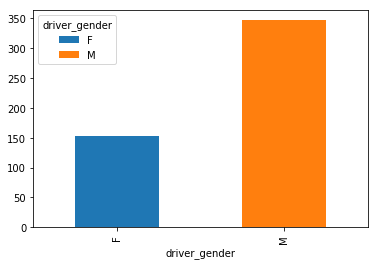

In [31]:
table.loc['Asian':'Hispanic']
table.plot(kind='bar', stacked=True)
plt.show()

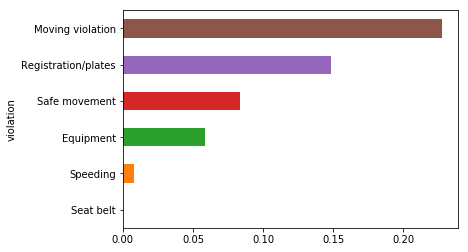

In [22]:
#Map one set of values to another- Map method using dict
''''mapping = {'up':True,'down':False}
police['test'] = police.change.map(mapping)'''
search_rate = police.groupby('violation').search_conducted.mean()
search_rate.sort_values().plot(kind='barh')
plt.show()

In [23]:
'''
weather = pd.read_csv('weather_csv')
weather.head()
#examine wind speed
weather[['AWND','WSF2']].describe()
#min, max, other stats

#create a box plot
weather.plot(kind='box')
plt.show

#create a histogram
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist',bins=20)
plt.show
'''

"\nweather = pd.read_csv('weather_csv')\nweather.head()\n#examine wind speed\nweather[['AWND','WSF2']].describe()\n#min, max, other stats\n\n#create a box plot\nweather.plot(kind='box')\nplt.show\n\n#create a histogram\nweather['WDIFF'] = weather.WSF2 - weather.AWND\nweather.WDIFF.plot(kind='hist',bins=20)\nplt.show\n"

In [24]:
'''
weather.shape
weather.columns
temp = weather.loc[:,'TAVG':'TMAX']
temp.shape
#sum of columns
temp.sum()
#sum of rows
temp.sum(axis='columns').head()

ri.stop_duration.unique()
array(['0-15 Min','16-30 Min','30+ Min'], dtype=object)
mapping = {'0-15 Min':'short','16-30 Min':'medium','30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
#category type stores data more efficiently than object
#allows you to specify a logical order
ri['stop_length'] = ri.stop_length.astype('category',ordered=True,categories=cats)
'''

"\nweather.shape\nweather.columns\ntemp = weather.loc[:,'TAVG':'TMAX']\ntemp.shape\n#sum of columns\ntemp.sum()\n#sum of rows\ntemp.sum(axis='columns').head()\n\nri.stop_duration.unique()\narray(['0-15 Min','16-30 Min','30+ Min'], dtype=object)\nmapping = {'0-15 Min':'short','16-30 Min':'medium','30+ Min':'long'}\nri['stop_length'] = ri.stop_duration.map(mapping)\n#category type stores data more efficiently than object\n#allows you to specify a logical order\nri['stop_length'] = ri.stop_length.astype('category',ordered=True,categories=cats)\n"

In [25]:
'''
#Merging dataframes
#makes index column
apple.reset_index(inplace=True)
apple_high = pd.merge(left=apple,right=high,left_one='date',right_on='DATE',how='left')
    #left=apple: Left DataFrame
    #right=high: Right DataFrame
    #left_on='date': Key column in left DataFrame
    #right_on='DATE': Key column in right DataFrame
    #how='left': Type of join
apple_high.set_index('date_and_time',inplace=True)
'''

"\n#Merging dataframes\n#makes index column\napple.reset_index(inplace=True)\napple_high = pd.merge(left=apple,right=high,left_one='date',right_on='DATE',how='left')\n    #left=apple: Left DataFrame\n    #right=high: Right DataFrame\n    #left_on='date': Key column in left DataFrame\n    #right_on='DATE': Key column in right DataFrame\n    #how='left': Type of join\napple_high.set_index('date_and_time',inplace=True)\n"

In [26]:
'''
#How does weather affect the arrest rate?
ri.search_conducted.mean()
ri.groupby('driver_gender').search_conducted.mean()
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()
search_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()
#Panda series with multi-index!
#outer index is rows, inner is columns!
search_rate.loc['Equipment', 'M']
#Convert a multi-indexed series to a dataframe
search_rate.unstack()
ri.pivot_table(index='violation', columns='driver_gender',
               values='search_conducted')
'''

"\n#How does weather affect the arrest rate?\nri.search_conducted.mean()\nri.groupby('driver_gender').search_conducted.mean()\nri.groupby(['violation', 'driver_gender']).search_conducted.mean()\nsearch_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()\n#Panda series with multi-index!\n#outer index is rows, inner is columns!\nsearch_rate.loc['Equipment', 'M']\n#Convert a multi-indexed series to a dataframe\nsearch_rate.unstack()\nri.pivot_table(index='violation', columns='driver_gender',\n               values='search_conducted')\n"

In [27]:
'''
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])
# Print the arrest rates for speeding violations in all three weather conditions
print(print(arrest_rate.loc['Speeding']))
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='driver_gender', values='search_conducted'))
'''

"\n# Save the output of the groupby operation from the last exercise\narrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()\n\n# Print the 'arrest_rate' Series\nprint(arrest_rate)\n\n# Print the arrest rate for moving violations in bad weather\nprint(arrest_rate.loc['Moving violation', 'bad'])\n# Print the arrest rates for speeding violations in all three weather conditions\nprint(print(arrest_rate.loc['Speeding']))\n# Unstack the 'arrest_rate' Series into a DataFrame\nprint(arrest_rate.unstack())\n\n# Create the same DataFrame using a pivot table\nprint(ri_weather.pivot_table(index='violation', columns='driver_gender', values='search_conducted'))\n"